In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from code.util import *
from code.modelhelper import *

# MLP w/ Engineered Features

In [12]:
BATCH_SIZE = 256
N_CLASS = 2
EPOCHS = 200

In [3]:
x = np.load("data/x_feat.npy")
y = np.load("data/y_onehot.npy")

In [4]:
x.shape

(127284, 51)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

In [6]:
print(x.shape, y.shape)

(127284, 51) (127284, 2)


In [24]:
model_input = Input(shape=(x.shape[1], ))
H = Dense(51, activation="relu")(model_input)
# H = Dropout(0.2)(H)
H = Dense(128, activation="relu")(H)
H = Dropout(0.4)(H)
H = Dense(32, activation="relu")(H)
# H = Dropout(0.2)(H)
model_output = Dense(N_CLASS, activation="softmax")(H)

model = Model(inputs=model_input, outputs=model_output)
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 51)]              0         
_________________________________________________________________
dense_11 (Dense)             (None, 51)                2652      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               6656      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 66        
Total params: 13,502
Trainable params: 13,502
Non-trainable params: 0
_______________________________________________________

In [25]:
es = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[es]
)

score = model.evaluate(x_test, y_test, verbose=2)

Train on 89098 samples, validate on 38186 samples
Epoch 1/200
89098/89098 [==============================] - 1s 9us/sample - loss: 0.3212 - accuracy: 0.8855 - val_loss: 0.1630 - val_accuracy: 0.9409
Epoch 2/200
89098/89098 [==============================] - 1s 6us/sample - loss: 0.1624 - accuracy: 0.9438 - val_loss: 0.1509 - val_accuracy: 0.9470
Epoch 3/200
89098/89098 [==============================] - 1s 6us/sample - loss: 0.1536 - accuracy: 0.9464 - val_loss: 0.1578 - val_accuracy: 0.9464
Epoch 4/200
89098/89098 [==============================] - 1s 6us/sample - loss: 0.1510 - accuracy: 0.9473 - val_loss: 0.1500 - val_accuracy: 0.9475
Epoch 5/200
89098/89098 [==============================] - 1s 6us/sample - loss: 0.1480 - accuracy: 0.9483 - val_loss: 0.1445 - val_accuracy: 0.9501
Epoch 6/200
89098/89098 [==============================] - 1s 6us/sample - loss: 0.1465 - accuracy: 0.9489 - val_loss: 0.1446 - val_accuracy: 0.9486
Epoch 7/200
89098/89098 [==============================]

89098/89098 [==============================] - 1s 6us/sample - loss: 0.1214 - accuracy: 0.9582 - val_loss: 0.1251 - val_accuracy: 0.9555
Epoch 56/200
89098/89098 [==============================] - 1s 6us/sample - loss: 0.1213 - accuracy: 0.9578 - val_loss: 0.1251 - val_accuracy: 0.9562
38186/38186 - 0s - loss: 0.1247 - accuracy: 0.9566


In [26]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_model = model.predict(x_test)
y_pred = to_bin(y_pred_model)
print("Test recall: {}".format(recall(y_test, y_pred)))

y_test0 = to_1D(y_test)
y_pred0 = to_1D(y_pred)
print(confusion_matrix(y_test0, y_pred0))

Test loss: 0.12471908914851199
Test accuracy: 0.9566333
Test recall: 0.8041968599033816
[[31203   359]
 [ 1297  5327]]


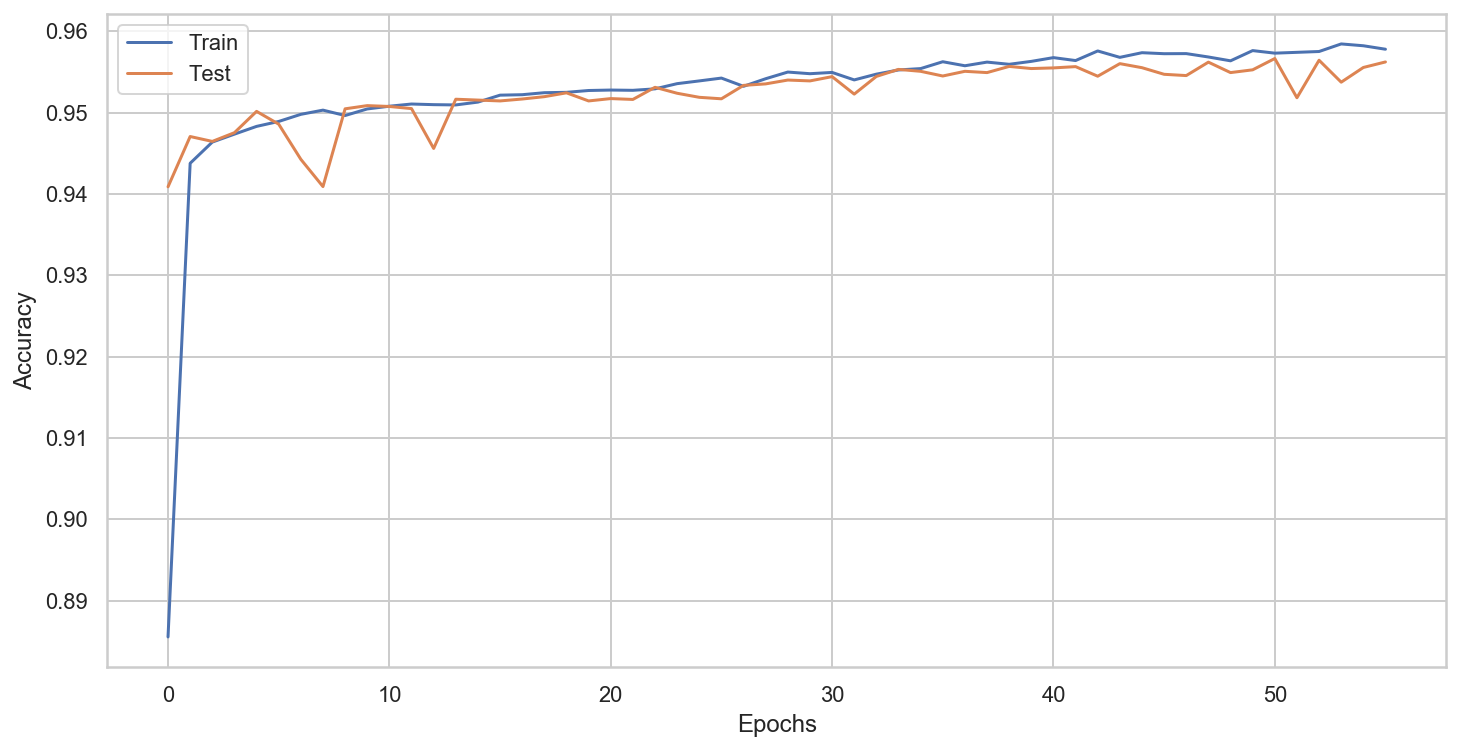

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [11]:
# model.save("models/mlp.h5")